**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

# **Исследовательский анализ данных**

### **Описание предметной области**

Вариант №2

Набор данных: **visits2.csv**

Данные пользовательских сессии магазина:

1. уникальный идентификатор пользователя
2. страна пользователя
3. устройство пользователя
4. идентификатор рекламного источника, из которого пришел пользователь
5. дата и время начала сессии
6. дата и время окончания сессии
7. время сессии в минутах
8. кол-во кликов пользователя
9. количество товаров в корзине
10. стоимость покупок 
11. возраст пользователя 

### **1. Чтение файла (набора данных)**

In [2]:
# импорт библиотек, чтение файла с помощью pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("visits2.csv", sep = ';')

### **2. Обзор данных**

2.1. Вывод первых 20 строк с помощью метода head.

In [3]:
df.head(20)

,user_id,region,device,channel,session_start,session_end,time_session,click_count,buy_count,price,age
0,278965908054,United States,iPhone,organic,01.05.2019 4:46,01.05.2019 4:47,1.0,0.0,0.0,0.0,31
1,244878945432,United States,Mac,organic,01.05.2019 16:44,01.05.2019 16:45,1.0,0.0,0.0,0.0,40
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32,83.0,28.0,6.0,14570.0,50
3,326433527971,United States,Android,TipTop,01.05.2019 0:29,01.05.2019 0:54,25.0,8.0,3.0,4411.0,38
4,349773784594,United States,Mac,organic,01.05.2019 3:33,01.05.2019 3:57,24.0,8.0,3.0,4411.0,63
5,90242400005,United States,Android,organic,01.05.2019 9:03,01.05.2019 10:08,65.0,22.0,4.0,11310.0,62
6,43958116050,United States,iPhone,organic,01.05.2019 9:37,01.05.2019 10:00,23.0,8.0,3.0,4411.0,60
7,15174034813,United States,Mac,organic,01.05.2019 13:33,01.05.2019 13:35,2.0,0.0,0.0,0.0,12
8,446013509831,United States,iPhone,organic,01.05.2019 14:44,01.05.2019 15:41,57.0,19.0,4.0,9872.0,52
9,100970711362,United States,Mac,FaceBoom,01.05.2019 6:20,01.05.2019 6:54,34.0,12.0,3.0,6326.0,25


2.2. Оценка данных с помощью метода info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         953 non-null    object 
 2   device         953 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


2.3. Оценка данных с помощью метода describe.

In [5]:
df.describe()

,user_id,time_session,click_count,buy_count,price,age
count,9.540000e+02,954.000000,954.000000,954.000000,954.000000,954.000000
mean,4.951807e+11,29.062893,9.830189,2.527254,5341.559748,39.810273
std,2.899488e+11,27.134816,9.209039,1.602003,5060.247685,13.038029
min,2.346325e+09,0.000000,0.000000,0.000000,0.000000,10.000000
25%,2.295122e+11,9.000000,3.000000,2.000000,2301.000000,29.000000
50%,4.984267e+11,21.000000,7.000000,2.000000,3739.000000,39.000000
75%,7.525332e+11,42.000000,14.000000,3.000000,7284.000000,50.000000
max,9.985130e+11,262.000000,88.000000,15.000000,56546.000000,71.000000


2.4. Исправление типов данных

In [6]:
df["session_start"] = pd.to_datetime(df["session_start"])
df["session_end"] = pd.to_datetime(df["session_end"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        954 non-null    int64         
 1   region         953 non-null    object        
 2   device         953 non-null    object        
 3   channel        954 non-null    object        
 4   session_start  954 non-null    datetime64[ns]
 5   session_end    954 non-null    datetime64[ns]
 6   time_session   954 non-null    float64       
 7   click_count    954 non-null    float64       
 8   buy_count      954 non-null    float64       
 9   price          954 non-null    float64       
 10  age            954 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 82.1+ KB


2.5. Работа с пропусками 

In [7]:
print(df.isna().sum())

df.loc[df['region'].isna(), 'region'] = "Without region"
df.loc[df['device'].isna(), 'device'] = "Without device"

print(df.isna().sum())

user_id          0
region           1
device           1
channel          0
session_start    0
session_end      0
time_session     0
click_count      0
buy_count        0
price            0
age              0
dtype: int64
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
time_session     0
click_count      0
buy_count        0
price            0
age              0
dtype: int64


2.6. Исправление дубликатов

In [8]:
# поиск дубликатов
print(df["region"].unique())
print(df["device"].unique())
print(df["channel"].unique())

['United States' 'Russia' 'Without region' 'USA']
['iPhone' 'Mac' 'Android' 'PC' 'MAC' 'IPHONE' 'Without device']
['organic' 'TipTop' 'FaceBoom' 'MediaTornado']


In [9]:
# исправление дубликатов
df["device"] = df["device"].replace("MAC","Mac")
df["device"] = df["device"].replace( "IPHONE", "iPhone")
print(df["device"].unique())

['iPhone' 'Mac' 'Android' 'PC' 'Without device']


**Вывод: Как видно, таблица содержит в себе данные о пользовательских сессии магазина, такие как уникальный идентификатор пользователя, страна пользователя, устройство пользователя, дата и время начала сессии, дата и время окончания сессии и пр. Названия столбцов изначально написаны в одном стиле, поэтому они не нуждались в корректировке. Некоторые типы данных были расставлены неверно, поэтому даты были исправлены с типа float64 в тип datetime64[ns]. Также была проведена работа с пропусками: так как информация о регионе и устройстве пользователя не имеет весомого значения, пропуски были заменены на надпись "без региона/устройства". Также были найдены и исправлены дубликаты слов в столбцах, написанные разным регистром.**

### **3. Построение диаграммы рассеяния**

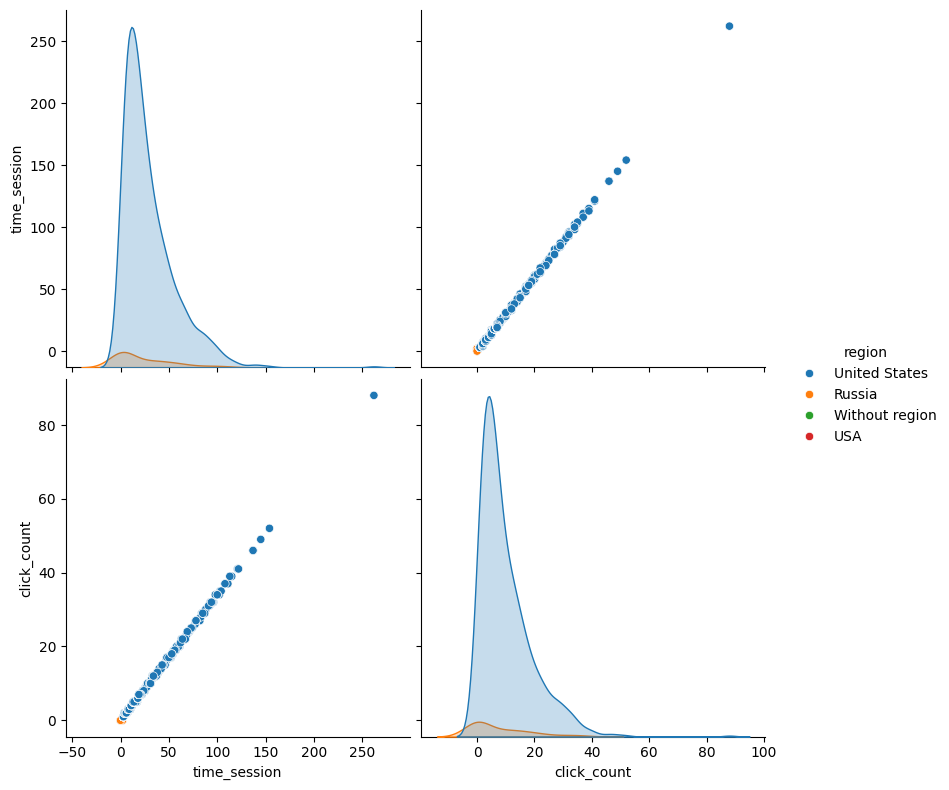

In [10]:
# Матрица диаграмм рассеяния
sns.pairplot(
    df[["time_session", "click_count", "region"]], # Искомые данные
    hue = "region", # Рассчетное поле
    height = 4 # Высота грани
)

**Вывод: Матрица диаграмм рассеяния построена по параметрам время сессии и количества кликов, сгруппирована по регионам. Можно увидеть, что между временем сессии и количеством кликов прямая зависимость: чем больше время, тем больше количество кликов. Также самое большое время сессии у пользователей из Соединенных Штатов.**

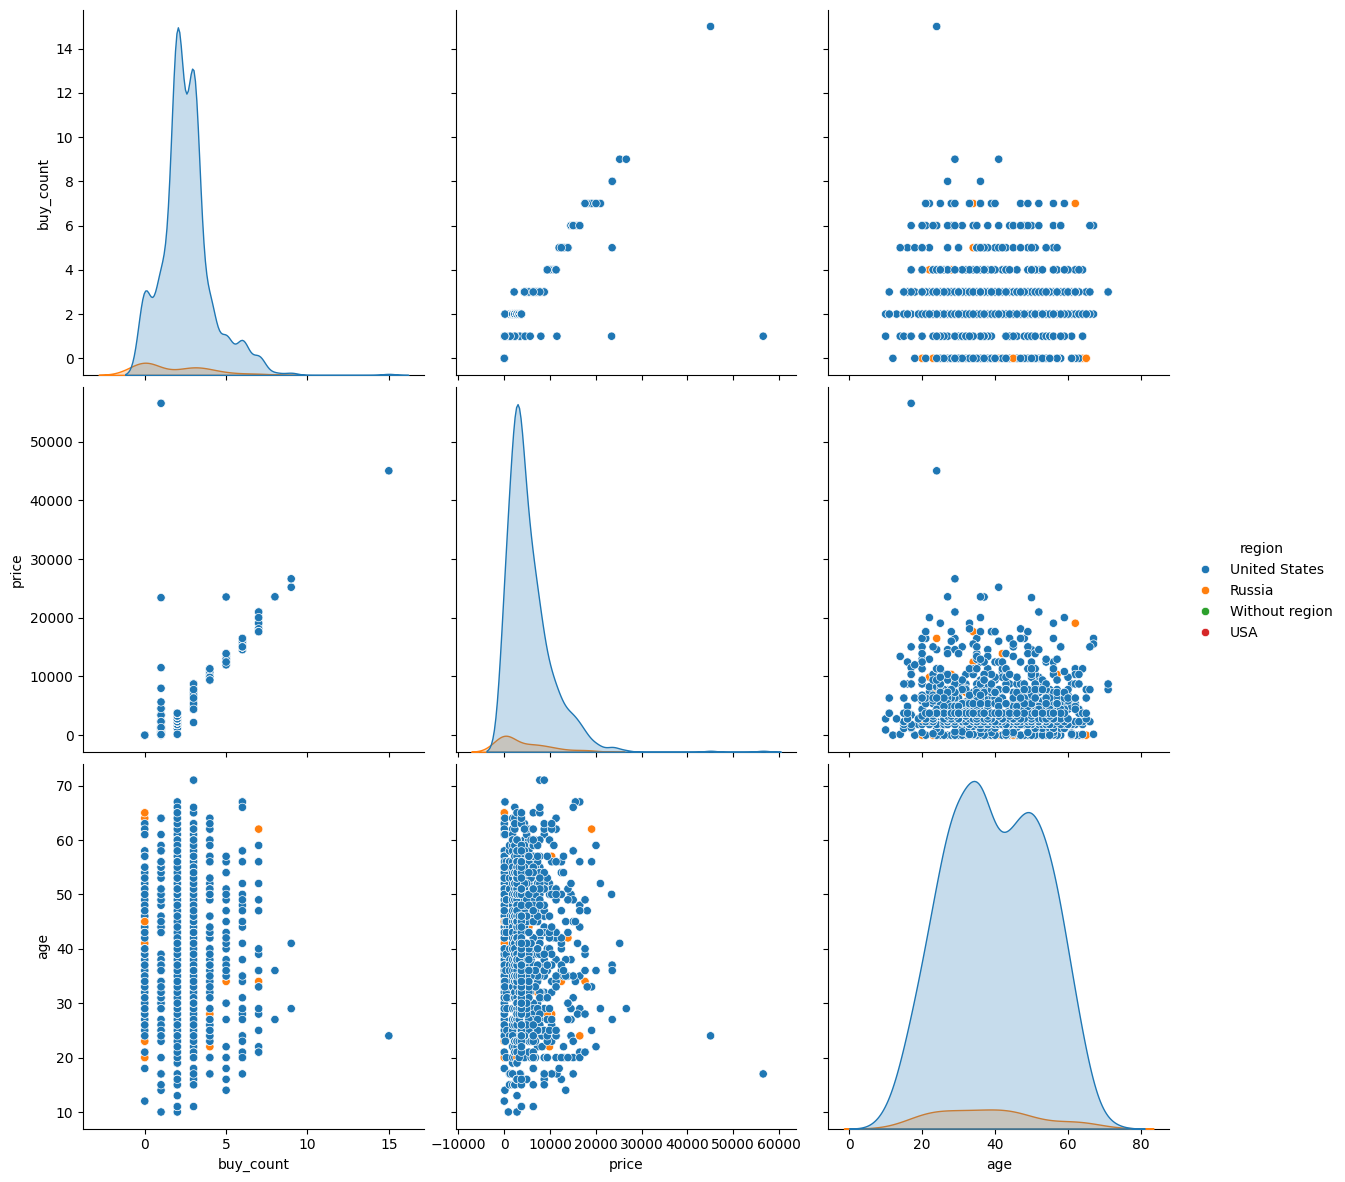

In [11]:
# Матрица диаграмм рассеяния
sns.pairplot(
    df[["buy_count","price", "age", "region"]], # Искомые данные
    hue = "region", # Рассчетное поле
    height = 4 # Высота грани
)

**Вывод: Матрица диаграмм рассеяния построена по параметрам количества товаров, стоимости покупок и возрасту пользователя, сгруппирована по регионам. Можно увидеть, что преобладающее большинство пользоватлей в стоимости стремятся к сумме от 0 до 10000. Также самое большое количество покупок, их стоимости и количество пользователей разных возрастов, в сравении с другими регионами, в основном у пользователей из Соединенных штатов. Количество покупок в большинстве своем стремится к числу от 0 до 5, а возраст пользователей - около 30-35 лет.**

### **4.Построение гистограмм**

<Axes: title={'center': 'Частота встречаемости разного времени сессии'}, xlabel='Время сессии в минутах', ylabel='Частота встречаемости'>

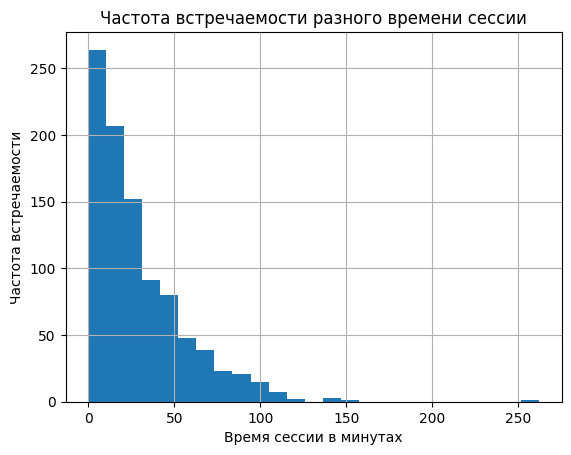

In [12]:
# Гистограмма по столбцу "Время сессии в минутах"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Частота встречаемости разного времени сессии") # Изменение названия
ax.set_xlabel("Время сессии в минутах") # Изменение названия по оси X
ax.set_ylabel("Частота встречаемости") # Изменение названия по оси Y

df["time_session"].hist(bins = 25, ax = ax) # Вывод графика по указанным настройкам

**Вывод: по данной гистограмме мы видим, что больше всего время сессии пользователей колеблется от 0 до 10 минут, реже - от 10 до 20. Также чем больше время сессии, тем меньше частота встречаемости. Было принято решение делить гистограмму на 25 столбцов, так как при таком делении наиболее удобно можно определить минуты и сделать выводы.**

<Axes: title={'center': 'Частота встречаемости разного количества кликов'}, xlabel='Количество кликов пользователя', ylabel='Частота встречаемости'>

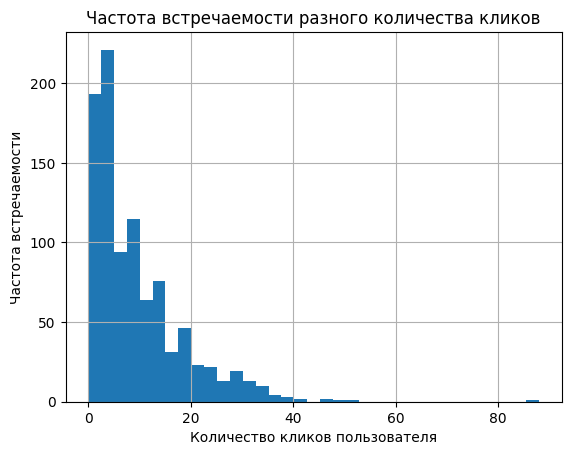

In [13]:
# Гистограмма по столбцу "Количество кликов пользователя"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Частота встречаемости разного количества кликов") # Изменение названия
ax.set_xlabel("Количество кликов пользователя") # Изменение названия по оси X
ax.set_ylabel("Частота встречаемости") # Изменение названия по оси Y

df["click_count"].hist(bins = 35, ax = ax) # Вывод графика по указанным настройкам

**Вывод: по данной гистограмме мы видим, что самое часто встречаемое количество кликов приблизительно от 3 до 5, причем тут уже не такое уменьшение частоты встречаемости при увеличении количества кликов, как на гистограмме выше, присутсвуют скачки. Было выбрано 35 bins для данной гистограммы, так как при таком числе наиболее наглядно и удобно анализировать гистограмму. Также при уменьшении bins уже становится не видно "скачки" частоты встречаемости кликов.**

<Axes: title={'center': 'Частота встречаемости разного количества товаров в корзине'}, xlabel='Количество товаров в корзине', ylabel='Частота встречаемости'>

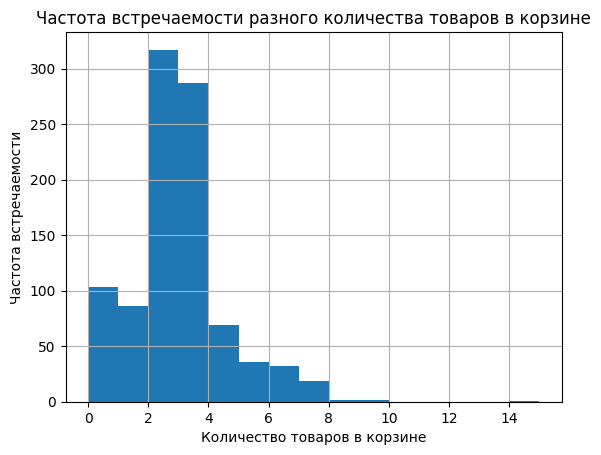

In [14]:
# Гистограмма по столбцу "Количество товаров в корзине"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Частота встречаемости разного количества товаров в корзине") # Изменение названия
ax.set_xlabel("Количество товаров в корзине") # Изменение названия по оси X
ax.set_ylabel("Частота встречаемости") # Изменение названия по оси Y

df["buy_count"].hist(bins = 15, ax = ax) # Вывод графика по указанным настройкам

**Вывод: по данной гистограмме видно, что в корзинах пользователей количество товаров варьируется от 2 до 3, реже от 3 до 4. Больше 8 товаров чаще никто в корзину не добавляет. Было принято решение делить гистограмму на 15 столбцов, так как при таком делении наиболее удобно анализировать ее.**

<Axes: title={'center': 'Частота встречаемости разной стоимости покупок'}, xlabel='Стоимость покупок', ylabel='Частота встречаемости'>

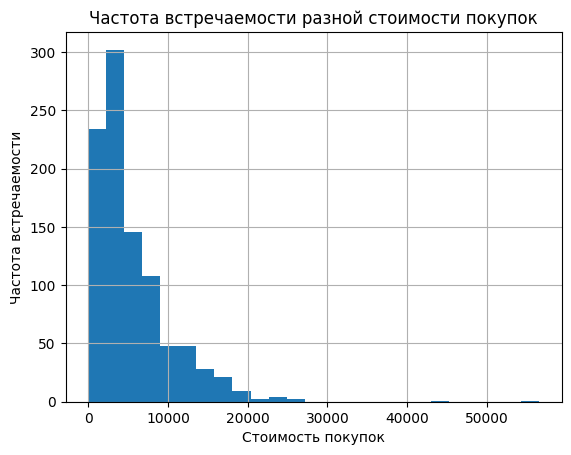

In [15]:
# Гистограмма по столбцу "Стоимость покупок"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Частота встречаемости разной стоимости покупок") # Изменение названия
ax.set_xlabel("Стоимость покупок") # Изменение названия по оси X
ax.set_ylabel("Частота встречаемости") # Изменение названия по оси Y

df["price"].hist(bins = 25, ax = ax) # Вывод графика по указанным настройкам

**Вывод: по данной гистограмме видно, что самая часто встречаемая стоимость покупок составляет примерно от 2 до 4 тысяч. Причем посел 4000 наблюдается заметный спад частоты встречаемости. Гистограмма была поделена на 25 столбцов, так как при таком делении можно сделать более подробный анализ, а при уменьшении количества столбцов перестает быть видно то, что спад встречаемости идет не с самого начала.**

<Axes: title={'center': 'Частота встречаемости разных возрастов пользователей'}, xlabel='Возраст пользователя', ylabel='Частота встречаемости'>

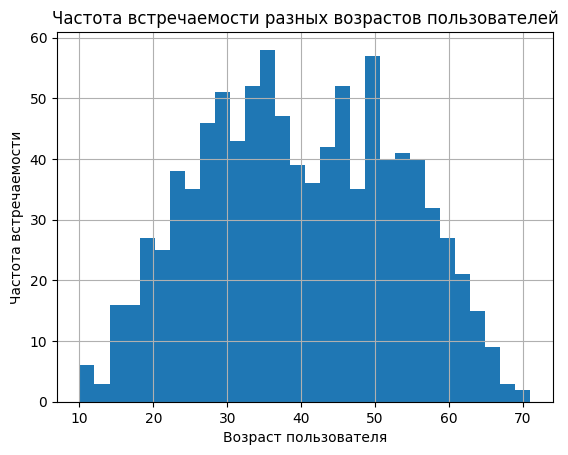

In [16]:
# Гистограмма по столбцу "Возраст пользователя"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Частота встречаемости разных возрастов пользователей") # Изменение названия
ax.set_xlabel("Возраст пользователя") # Изменение названия по оси X
ax.set_ylabel("Частота встречаемости") # Изменение названия по оси Y

df["age"].hist(bins = 30, ax = ax) # Вывод графика по указанным настройкам

**Вывод: по данной гистограмме мы видим, что гистограмма возраста пользователей не имеет постоянного роста или спада, частота меняется скачками, то растет, то убывает. На ней видно, что пользователи разного возраста встречаются с небольшим различием. Меньше всего пользоватлей в возрасте от 10(до 10 вообще нет) до 15 лет и от 65 до примерно 72. Было принято решение делить гистограмму на 30 столбцов в связи с тем, что при таком делении наиболее подробный анализ можно сделать.**

### **5. Оценка коэффициента корреляции и ковариации**

5.1. Оценка корреляции 

,time_session,click_count,buy_count,price,age
time_session,1.000000,0.999132,0.946494,0.904693,-0.036285
click_count,0.999132,1.000000,0.948782,0.905490,-0.035191
buy_count,0.946494,0.948782,1.000000,0.873860,-0.034843
price,0.904693,0.905490,0.873860,1.000000,-0.054976
age,-0.036285,-0.035191,-0.034843,-0.054976,1.000000


<Axes: >

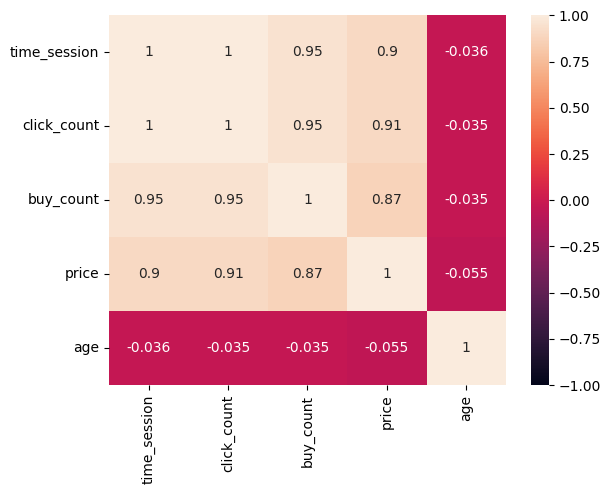

In [17]:
# Расчет корреляции
corr = df[["time_session", "click_count", "buy_count", "price", "age"]].corr (numeric_only = True)
display(corr)
sns.heatmap(corr, annot = True, vmax = 1, vmin = -1) # Вывод тепловой карты корреляции

5.2. Оценка ковариации


,time_session,click_count,buy_count,price,age
time_session,736.298244,249.668614,41.144139,1.242224e+05,-12.836953
click_count,249.668614,84.806391,13.997288,4.219587e+04,-4.225326
buy_count,41.144139,13.997288,2.566413,7.083974e+03,-0.727772
price,124222.376091,42195.870597,7083.974236,2.560611e+07,-3627.071024
age,-12.836953,-4.225326,-0.727772,-3.627071e+03,169.990199


<Axes: >

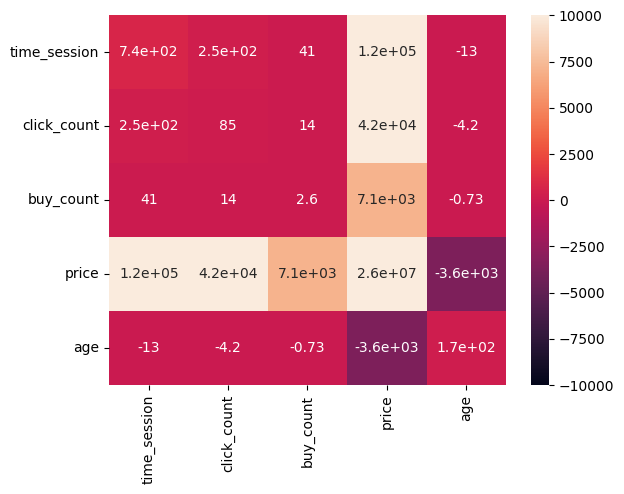

In [18]:
# Расчёт ковариации
cov = df[["time_session", "click_count", "buy_count", "price", "age"]].cov(numeric_only = True)
display(cov)
sns.heatmap(cov, annot = True, vmax = 10000, vmin = -10000) # Вывод тепловой карты ковариации

**Вывод: Корреляция и ковариация показывают, насколько две переменные изменяются вместе. Разница между ними в том, что ковариация показывает только зависимость между двумя переменными, а корреляция показывает силу и направление этой зависимости. Положительное число означает, что две переменные изменяются в одну сторону, отрицательное говорит об обратном. В данном случае видно, что между time_session, click_count, buy_count и price - прямая зависимость, а вот с age у всех них отрицательная зависимость, причем очень слабая. При этом знаки перед числами у коэффициентов корреляции и ковариации совпадает, что говорит об их корректности.**

### **6. Построение графика по варианту**

**Задание 1 : Использовать seaborn.** По группировке **- device** и количество
клиентов, привлеченных из рекламных источников каждого типа **(channel)**
построить диаграмму.

Text(0.5, 1.0, 'Histogram of the number of customers for each device and channel of attraction')

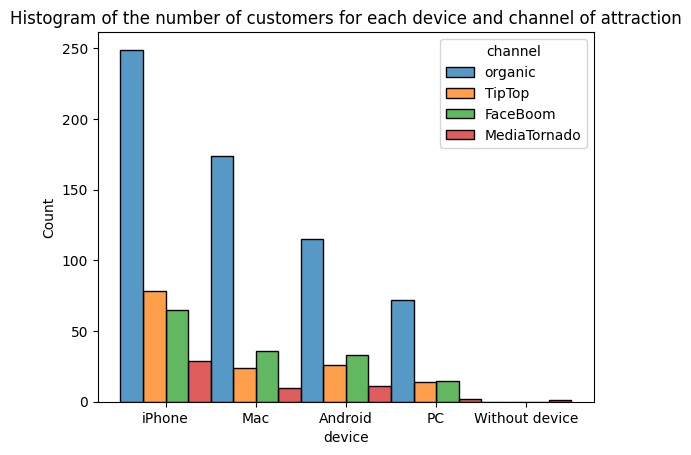

In [19]:
# Гистограмма по полям device и channel
ax = sns.histplot(
    df, # Основные данные
    x = "device", # Ось Х, ось Y по умолчанию станет количеством
    hue = "channel", # Тип данных, по которым ведётся сводка
    multiple = "dodge" # Изменение наложения графиков
)
ax.set_title("Histogram of the number of customers for each device and channel of attraction")

**Вывод: Для создания диаграммы использовался метод histplot, в который был передан объект DataFrame. Параметр x выбирает столбец для оси x, параметр hue является исследуемым полем, а параметр multiple = dodge выбирает способ отображения нескольких диаграмм на одном графике. По результатам можно сделать вывод, что клиенты с любым из указанных устройств в преимущественном большинстве были привлечены через organic channel.**

**Задание 2: Использовать pandas и plot.** По сводной таблице (pivot_table) - отобразить уникальное (nunique) количество пользователей для каждого устройства **(device)**. Оставить только маркеры в виде ▲ красного цвета размером
20.

Text(0, 0.5, 'Количество пользователей')

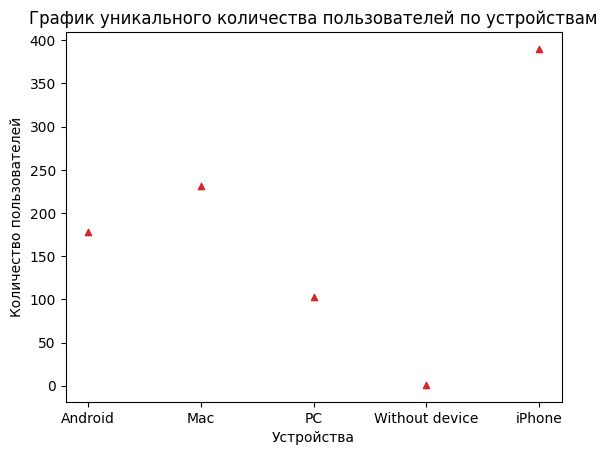

In [20]:
# Диаграмма рассеяния по сводной таблице
pivot = df.pivot_table(index = "device", values = "user_id", aggfunc = "nunique").reset_index() # Создание сводной таблицы
plt.scatter(
    pivot["device"], # Ось Х
    pivot["user_id"], # Ось Y
    marker = "^",
    c = "tab:red", # Изменение цвета маркера
    s = 20 # Изменение размера маркера
)
plt.title("График уникального количества пользователей по устройствам")
plt.xlabel('Устройства')
plt.ylabel('Количество пользователей')

**Вывод: Для создания диаграммы используется метод scatter, принимающий поля сводной таблицы. Изменение маркера происходит при помощи параметра markers, изменение цвета - при помощи параметра c, а размер задаётся параметром s. В диаграмме можно увидеть, что самое большое количество уникальных пользователей у iPhone(примерно 390), а меньше всего у PC(примерно 100). Without device не учитывается, так как это не устройство, а просто выбранная замена для незаполненного поля(исправлялось ранее).**

**Задание 3: Использовать matplotlib.** Построить круговую диаграмму, которая
отображает процент каждого рекламного источника **(channel)**.

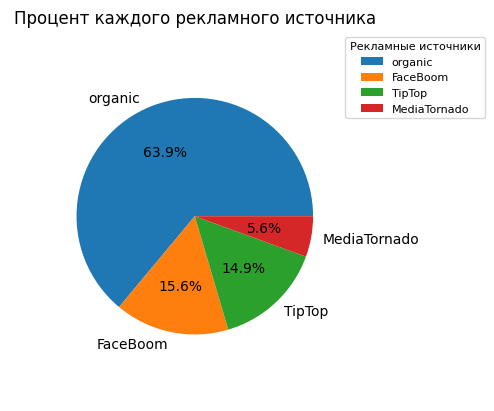

In [21]:
counts = df["channel"].value_counts() # Подсчёт частоты различных рекламных источников
plt.pie(
    counts, # Основные данные посчёта
    labels = counts.index, # Название каждой категории типом продавца
    autopct = '%1.1f%%', # Формат вывода процентов
    radius = 0.8 # Размер
)
plt.title("Процент каждого рекламного источника") # Добавление заголовка
plt.legend(
    counts.index, # Создание легенды
    title = 'Рекламные источники', # Заголовок легенды
    bbox_to_anchor = (0.8, 0.5, 0.5, 0.5), # Расположение легенды
    fontsize  = 8, title_fontsize = 8 # Размер шрифта
)

**Вывод: Круговая диаграмма создаётся при помощи метода pie на основе подсчёта частоты различных рекламных источников. После настроек диаграммы при помощи метода legend добавляется легенда, дополнительно поясняющая каждый цвет. По диаграмме видно, что больший процент от реклам составляет organic channel, а меньший - MediaTornado, FaceBoom и TipTop приблизительно равны.**

### **7. Построение графика типа Hexagonal binning plot**

7.1. Построение графика типа Hexagonal binning plot по полям click_count и time_session

<Axes: xlabel='click_count', ylabel='time_session'>

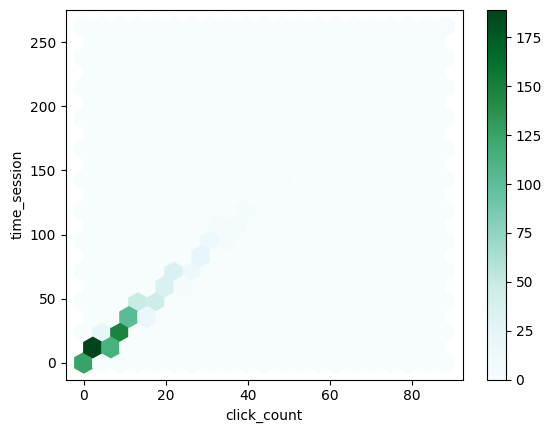

In [57]:
# Hexagonal binning plot
df.plot(
    x = "click_count",
    y = "time_session",
    kind = "hexbin",
    gridsize = 20
)

7.2. Построение графика типа Hexagonal binning plot по полям age и price

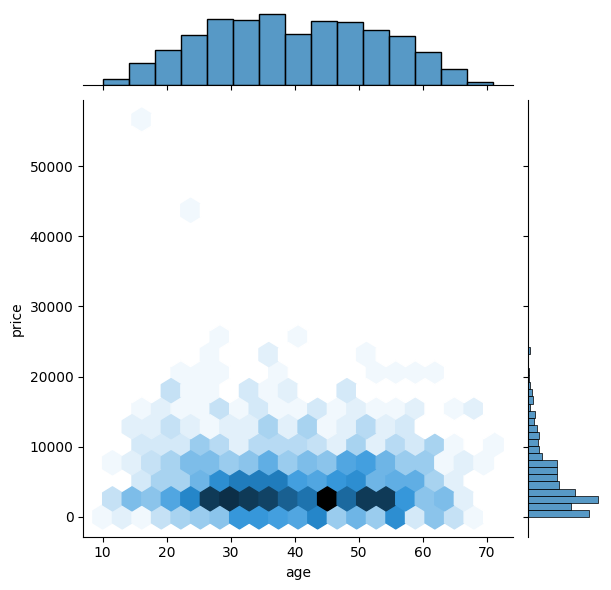

In [60]:
# Hexagonal binning plot с seaborn
sns.jointplot(
    data = df,
    x = "age",
    y = "price",
    kind = "hex",
    gridsize = 20
)


**Вывод: Для создания подобной диаграммы требуется указать параметр kind = hexbin. В таком случае график делится на шестиугольные области, чем больше точек попадёт в область, тем более тёмной она станет. На первом графике видно, что чаще всего пользователи делают от 0 до 5 кликов за проведенные 0-20 минут сессии. На втором графике, в отличие от первого, используется библиотека seaborn с теми же параметрами, но по другим полям, а именно стоимость и возраст. Видно, что преобладающее большинство это покупатели около 45 лет, составляющие корзину на сумму примерно от 1 до 3 тысяч. Библиотека seaborn более наглядна, так как по бокам выводит допольнительные диаграммы, что упрощает понимание.**

### **8. Построение графика Boxplot**

Text(0.5, 1.0, 'Age')

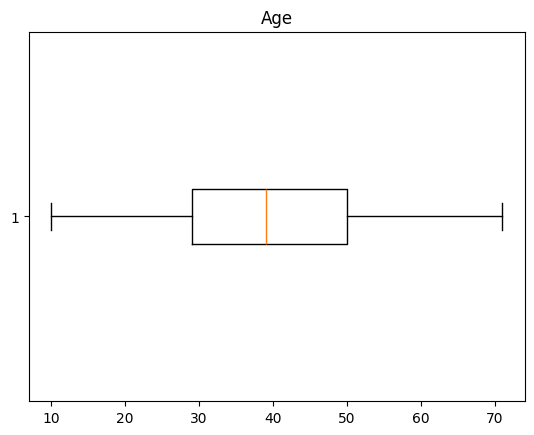

In [23]:
# Диаграмма разброса (Boxplot)
plt.boxplot(df["age"], vert = False)
plt.title("Age")

**Вывод: Диаграмма размаха показывает распределение набора данных на основе сводки из пяти ключевых чисел: минимума, первого квартиля (Q1), медианы (Q2), третьего квартиля (Q3) и максимума. Границы "ящика" являются границами первого и третьего квартиля, а границы усов - минимумом и максимумом. В данном случае видно, что минимум age равен 10, первый квартиль приблизительно равен 29, медиана - 39, третий квартиль - 50, а максимум равен примерно 72. Выбросов(нетипичные наблюдения) нет.**

### **9. Создание Boxplot по категориям**

9.1. Создание категорий

In [29]:
# Категоризация
df["time_session_category"] = pd.cut(df["time_session"], [0, 30, 70, 270], labels = ["Low", "Medium", "High"])

9.2. Создание диаграммы по категории "Низкая"

Text(0.5, 1.0, 'Low')

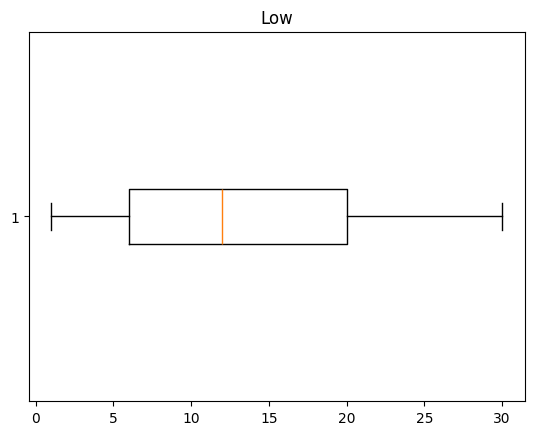

In [41]:
# Создание диаграммы по категории "Низкая"
df_low = df[df["time_session_category"] == "Low"]
plt.boxplot(df_low["time_session"], vert = False)
plt.title("Low")

9.3. Создание диаграммы по категории "Средняя"

Text(0.5, 1.0, 'Medium')

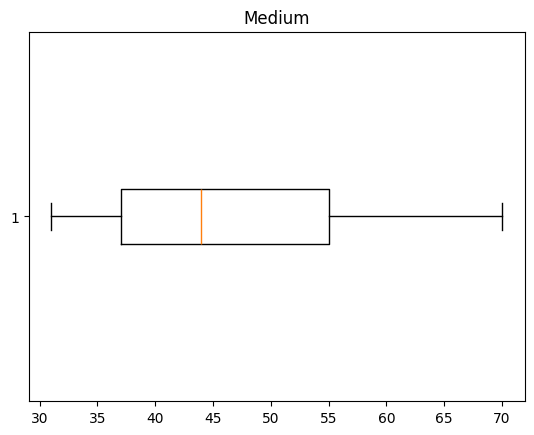

In [42]:
# Создание диаграммы по категории "Средняя"
df_medium = df[df["time_session_category"] == "Medium"]
plt.boxplot(df_medium["time_session"], vert = False)
plt.title("Medium")

9.4. Создание диаграммы по категории "Высокая"

Text(0.5, 1.0, 'High')

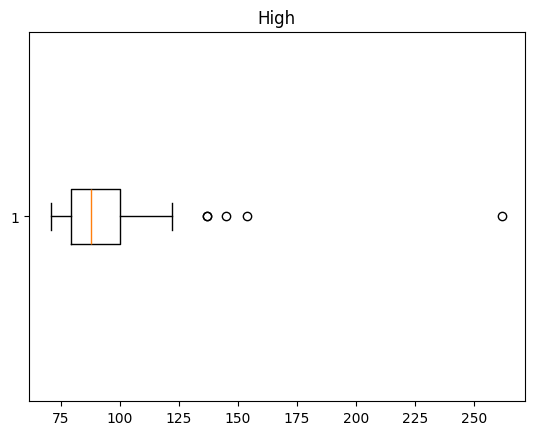

In [43]:
# Создание диаграммы по категории "Высокая"
df_high = df[df["time_session_category"] == "High"]
plt.boxplot(df_high["time_session"], vert = False)
plt.title("High")

**Вывод: Категории были созданы при помощи метода cut. Для анализа был выбрал столбец с временем сессии, который был разделён на низкую, среднюю и высокую категории(0, 30, 70, 270 соответственно). На первом графике видно, что минимальное значение равно 1, первый квартиль = 6, медиана 12, третий квартиль 20, а максимальное значение равно 30 соответсвенно. На втором графике минимальное значение 31, первый квартиль 37, медиана 44, третий квартиль 55, максимальное значение 70 соответственно. На третьем наблюдаются выбросы, самый большой около 260 минут.**

### **10. Создание Boxplot посредством разных библиотек**

10.1. Категоризация

In [53]:
# Категоризация
df["click_count_category"] = pd.cut(df["click_count"], bins = 3, labels = ["Few", "Medium", "Much"])
df["age_category"] = pd.cut(df["age"], bins = 3, labels = ["Young", "Аdult", "Old"])

10.2. Диаграмма разброса по полям click_count_category и age (seaborn)

Text(0.5, 1.0, 'Boxplot by click_count_category and age (seaborn)')

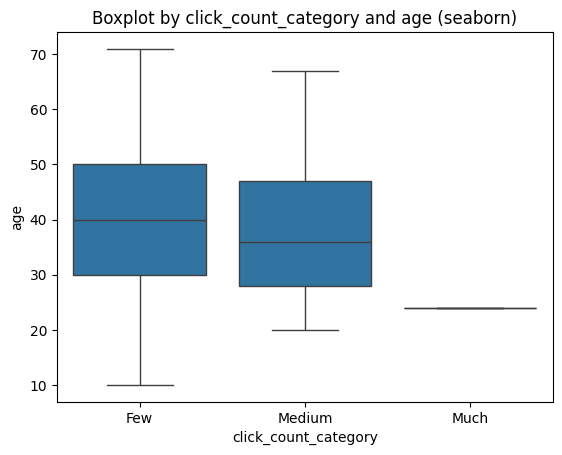

In [54]:
sns.boxplot(df, x = "click_count_category", y = "age").set_title("Boxplot by click_count_category and age (seaborn)")

10.3. Диаграмма разброса по полям age_category и price (pandas)

<Axes: title={'center': 'price'}, xlabel='age_category'>

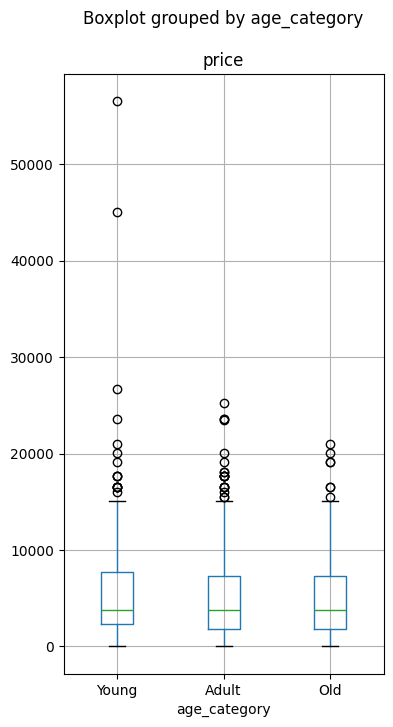

In [55]:
df.boxplot(by = "age_category", column = "price", figsize = (4, 8))

**Вывод: Для отображения были созданы категории по количеству кликов (мало, умеренно, много) и возрасту (юный, взрослый и старый). По первой диаграмме, созданной на основе категорий количества кликов, видно, что квартили первых двух категорий приблизительно равно, но обхват значений(возрастов) у категории Few больше, чем у категории Medium. Категория Much обладает крайне малым обхватом и встречается только у возраста около 25 лет. Во втором графике, основанному на категориях возраста, можно увидеть, что минимальные и максимальные значения, а также три квартиля всех категорий примерно равны, отличаются их выбросы(нетипичные наблюдения), самое большое значение выброса у категории Young и приблизительно равно 56000.**

### **Вывод**

В ходе выполнения лабораторной работы были рассмотрены различные методы визуализации данных (диаграмма рассеяния, круговая диаграмма, гистограмма и пр.). Обработке подвергался файл, содержащий данные об пользовательских сессии магазина, такие как уникальный идентификатор, страна, устройство, время сессии пользователя и др. В ходе анализа данных были выявлены логические закономерности, например, чем больше время сессии, тем больше количество кликов пользователя. При этом разные графики подходят для разных сводок. Так, гистограммы позволяют удобно сравнивать показатели по категориям (например, количество клиентов по каждому устройству и каналу привлечения); диаграмма рассеяния позволяет увидеть количественный разбор наглядно, а круговая диаграмма - посмотреть, какую долю составляет та или иная категория каналов привлечения; тепловая карта корреляции удобна тем, что каждая ячейка такой матрицы показывает степень взаимосвязи между двумя параметрами, а интенсивность цвета отражает силу этой взаимосвязи, по ней можно узнать изменяются два параметра положительно(1), отрицательно(-1) или нейтральны(0), например, с помощью такой карты был сделан вывод о том, что между time_session, click_count, buy_count и price - прямая зависимость, а вот с age у всех них отрицательная зависимость. Для написания кода использовались библиотеки pandas, matplotlib и seaborn, предоставляющие большой и удобный функционал для вывода диаграмм и их точной настройки.